In [1]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.losses import categorical_crossentropy
from keras import backend as K
from keras.optimizers import Adadelta
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import callbacks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


Using TensorFlow backend.


Inspiration from : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Params

In [2]:
# dimensions of our images.
img_width, img_height = 200, 200

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = 'data/test'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 3
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3) 

# Model

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Data Gen

In [13]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='binary')

Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


# Tensoboard

In [5]:
tbCallBack = callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Fit

In [6]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[tbCallBack])

Epoch 1/3
125/125 [==============================] - 265s - loss: 0.6037 - acc: 0.6960 - val_loss: 0.6212 - val_acc: 0.6518
Epoch 2/3
125/125 [==============================] - 242s - loss: 0.3490 - acc: 0.8595 - val_loss: 0.2793 - val_acc: 0.8750
Epoch 3/3
125/125 [==============================] - 234s - loss: 0.2311 - acc: 0.9125 - val_loss: 0.2784 - val_acc: 0.9003


# Test

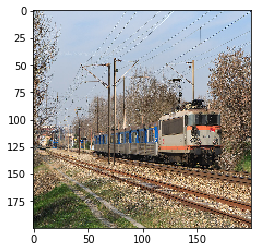

In [8]:
for (imgs, labels) in test_generator:
    plt.imshow(imgs[0])
    break

In [14]:
i = 0
ltest = []
llabels = []
for (imgs, labels) in test_generator:
    i+=1
    if i==15:
        break
    ltest.append(imgs[0])
    llabels.append(labels)

In [15]:
res = model.predict(np.array(ltest))

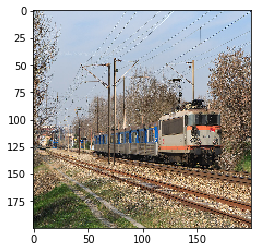

ELEC
--------------------------------------------------------------------------------


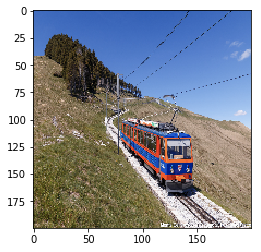

ELEC
--------------------------------------------------------------------------------


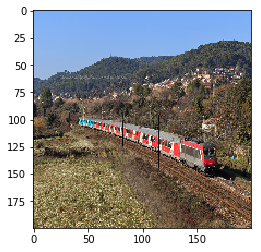

ELEC
--------------------------------------------------------------------------------


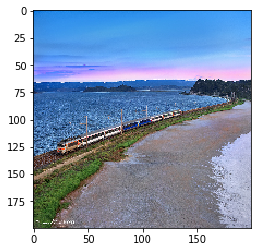

ELEC
--------------------------------------------------------------------------------


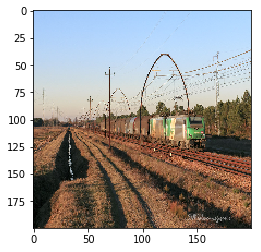

ELEC
--------------------------------------------------------------------------------


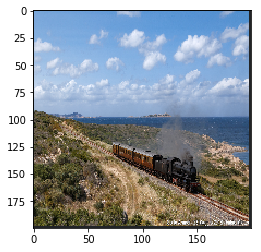

STEAM
--------------------------------------------------------------------------------


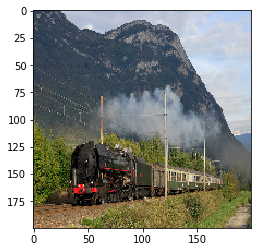

STEAM
--------------------------------------------------------------------------------


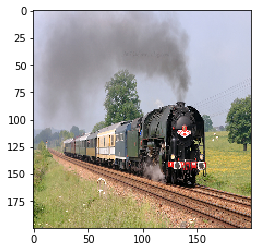

STEAM
--------------------------------------------------------------------------------


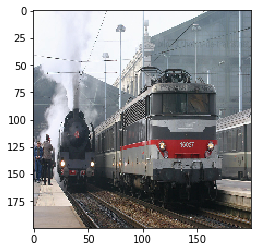

STEAM
--------------------------------------------------------------------------------


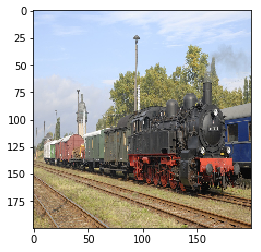

STEAM
--------------------------------------------------------------------------------


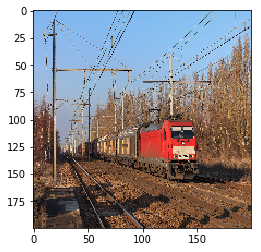

ELEC
--------------------------------------------------------------------------------


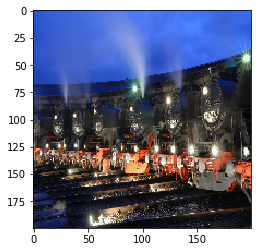

ELEC
--------------------------------------------------------------------------------


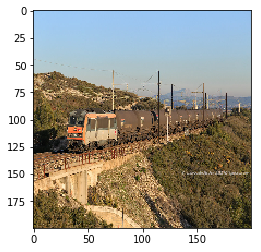

ELEC
--------------------------------------------------------------------------------


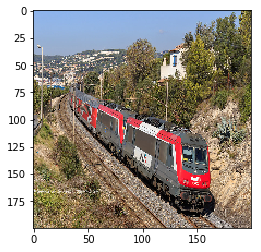

ELEC
--------------------------------------------------------------------------------


In [16]:
for j in range(len(ltest)):
    plt.imshow(ltest[j])
    plt.show()
    print("STEAM" if res[j]>0.5 else "ELEC")
    print("-"*80)

# Save

In [ ]:
model.save_weights('deeeptrain.h5')